<a href="https://colab.research.google.com/github/NavneetSajwan/Car-profiles-classifier/blob/master/Car_Part_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
!unzip -q '/content/drive/My Drive/Car part classification.zip'

In [0]:
path = Path('/content/Car part classification')

In [0]:
path

PosixPath('/content/Car part classification')

In [0]:
path.ls()

[PosixPath('/content/Car part classification/Right Front'),
 PosixPath('/content/Car part classification/Right'),
 PosixPath('/content/Car part classification/Front'),
 PosixPath('/content/Car part classification/Left'),
 PosixPath('/content/Car part classification/Left Rear'),
 PosixPath('/content/Car part classification/Rear'),
 PosixPath('/content/Car part classification/Left Front'),
 PosixPath('/content/Car part classification/Right Rear')]

In [0]:
# a.items[0].parent.name.split()

In [0]:
np.random.seed(42)
src = (ImageList.from_folder(path)
       .split_by_rand_pct(0.2)
       .label_from_func(lambda o:  o.parent.name.split()))

In [0]:
data = (src.transform(get_transforms(do_flip = False, max_zoom = 1), size=(448,448))
        .databunch().normalize(imagenet_stats))

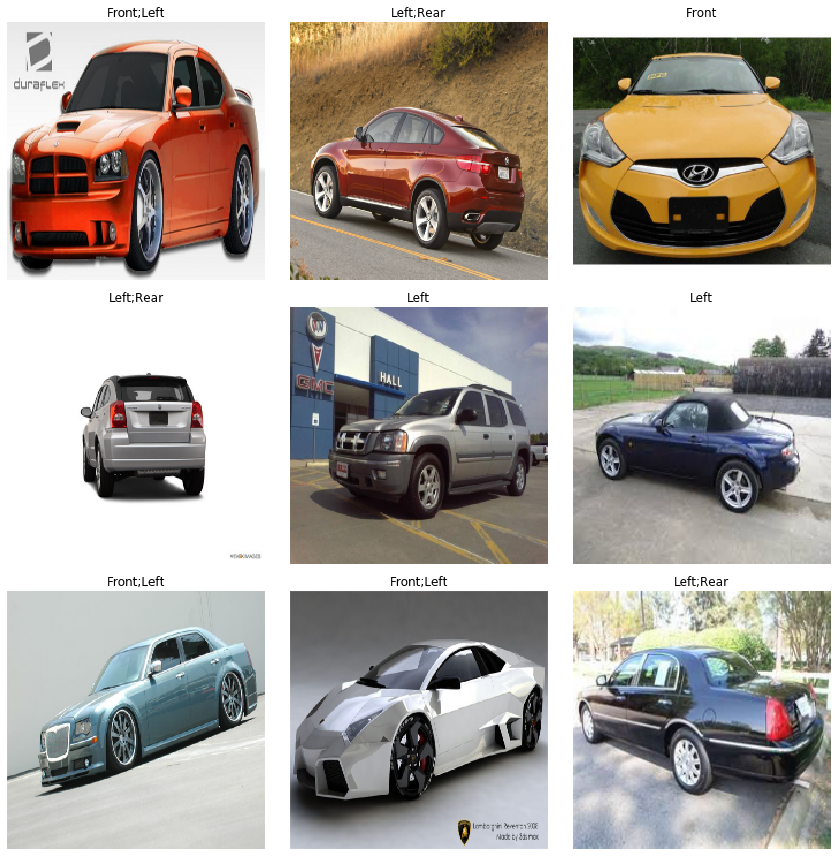

In [0]:
data.show_batch(3)

In [0]:
arch = models.resnet34

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.25)
f_score = partial(fbeta, thresh=0.25)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-07
Min loss divided by 10: 2.51E-02


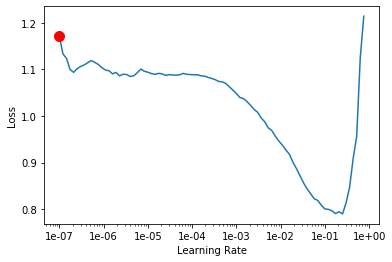

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(skip_start = 0,suggestion = True)

In [0]:
lr = 2e-2
learn.fit_one_cycle(5, slice(lr))

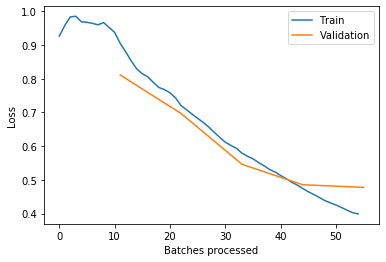

In [0]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-05
Min loss divided by 10: 1.00E-04


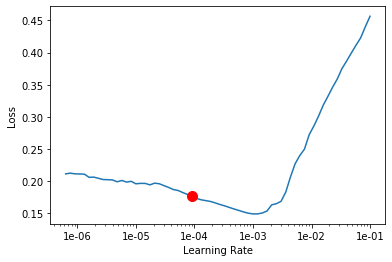

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [0]:
lr = 1e-4
learn.fit_one_cycle(10, slice(lr/10, lr))

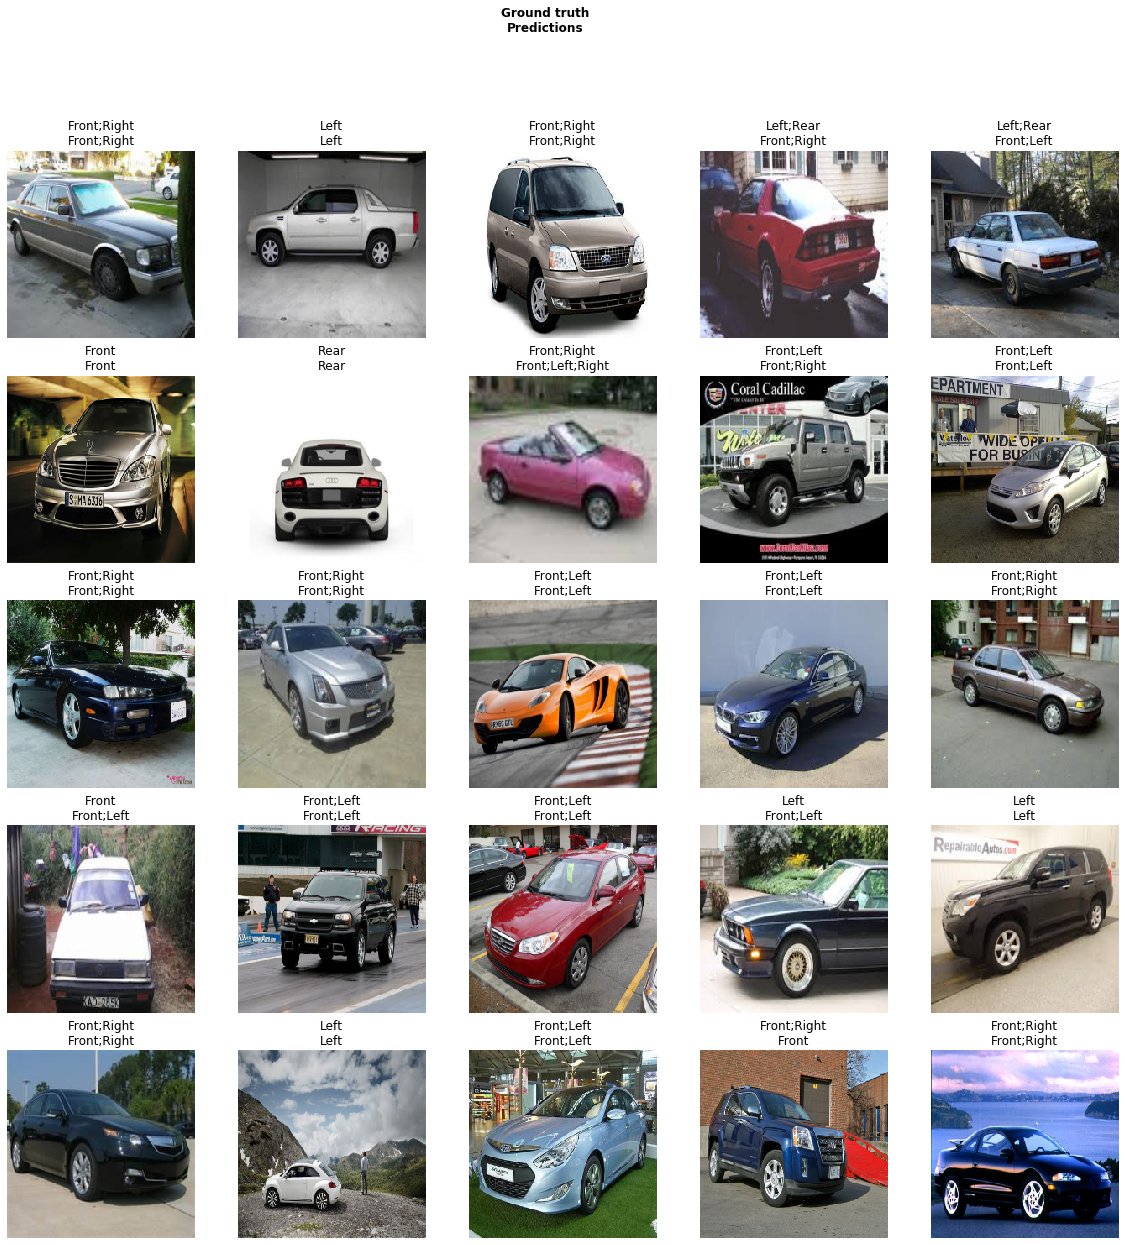

In [0]:
learn.show_results()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

16 misclassified samples over 176 samples in the validation set.


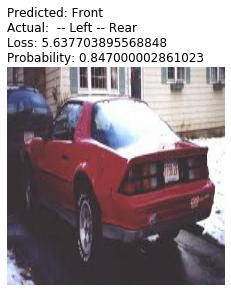

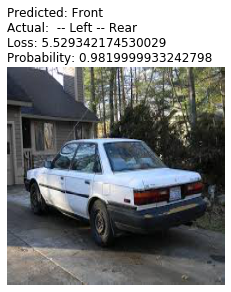

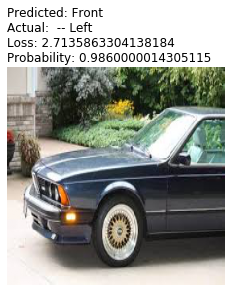

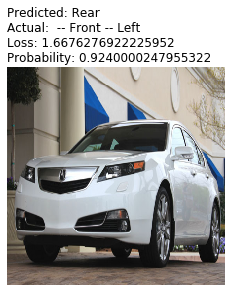

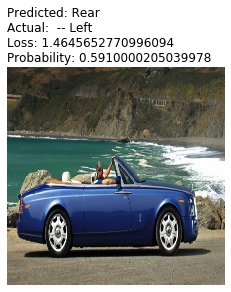

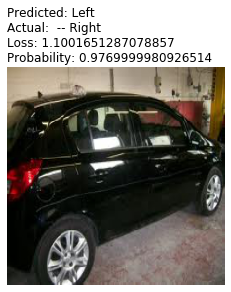

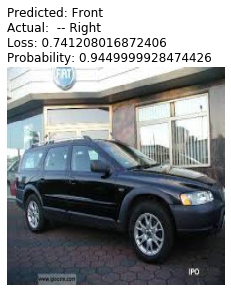

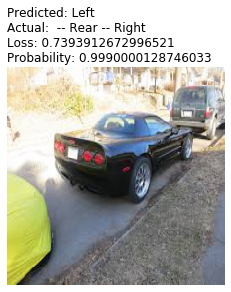

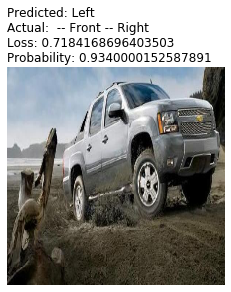

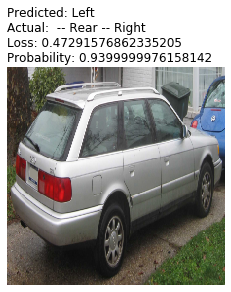

In [0]:
interp.plot_multi_top_losses(samples = 10, figsize=(4,4))

In [0]:
img = open_image('/content/0459.JPEG')
img, learn.predict(img)

(Image (3, 194, 259),
 (MultiCategory Front;Left;Rear,
  tensor([1., 1., 1., 0.]),
  tensor([0.7623, 0.9886, 0.8457, 0.0146])))

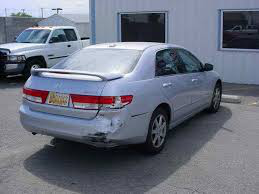

In [0]:
img

In [0]:
data.classes

['Front', 'Left', 'Rear', 'Right']